In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
import catboost as cb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             878 non-null    int64  
 1   age            878 non-null    int64  
 2   Pedicle        878 non-null    int64  
 3   Breast Wieght  878 non-null    int64  
 4   SNN            878 non-null    int64  
 5   PMH            878 non-null    int64  
 6   Smoker         876 non-null    float64
 7   BMI            878 non-null    int64  
 8   Complication   878 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 61.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             878 non-null    int64 
 1   age            878 non-null    int64 
 2   Pedicle        878 non-null    int64 
 3   Breast Wieght  878 non-null    int64 

C:\Users\SarayeTell\AppData\Local\Temp\ipykernel_86920\1296150329.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  source["Smoker"].fillna("0", inplace=True)
C:\Users\SarayeTell\AppData\Local\Temp\ipykernel_86920\1296150329.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  source["Smoker"].fillna("0", inplace=True)


<Axes: >

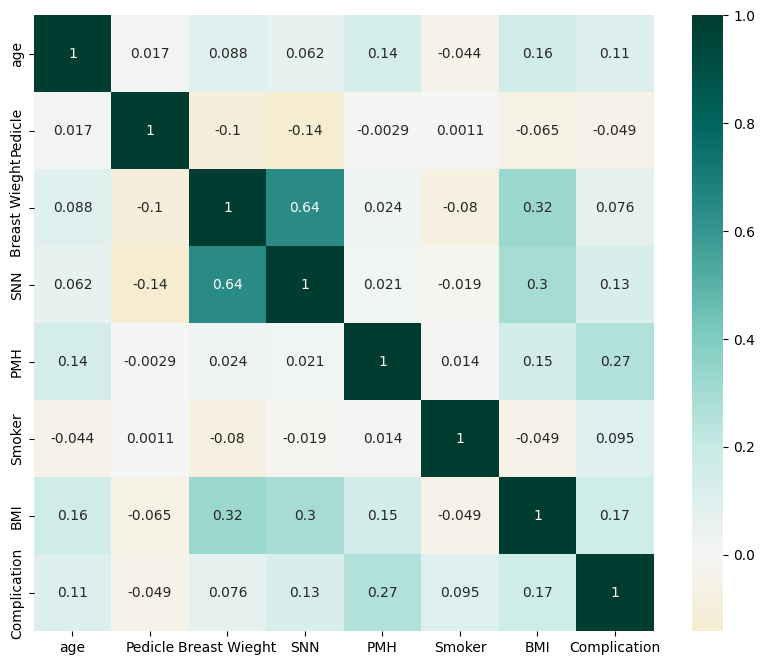

In [27]:
source_path = 'DataSource.csv'

source = pd.read_csv(source_path)

source.drop(columns=["Minor", "Major"], inplace=True)

source.info()

source["Smoker"].mode()
source["Smoker"].fillna("0", inplace=True)
source.info()

corr = source.drop(columns=["ID"])
fig , ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr.corr('pearson'), center=0, cmap="BrBG", annot=True)

In [28]:
X = source.drop(columns=["ID", "Complication"])
y = source["Complication"]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42)

In [29]:
cat_features = [x for x in X_train.keys()]
print(cat_features)
cat_features = ['age', 'Pedicle', 'Breast Wieght', 'SNN', 'PMH', 'Smoker', 'BMI']

['age', 'Pedicle', 'Breast Wieght', 'SNN', 'PMH', 'Smoker', 'BMI']


In [30]:
X_train[cat_features] = X_train[cat_features].astype(str)
X_test[cat_features] = X_test[cat_features].astype(str)

model = cb.CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    cat_features=cat_features, 
    random_seed=42,
    verbose=100
)

model.fit(X_train, y_train, eval_set=(X_test, y_test))


CatBoostError: catboost/private/libs/target/target_converter.cpp:410: Target with classes must contain only 2 unique values for binary classification